<a href="https://colab.research.google.com/github/ujjwalkakade09/Prediction/blob/master/SVM_and_Linear_Regression_for_1_day_From_30_days_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 # In this program we are predicting Stock price for the Google Stock for a specific day using the Machine Learning algorithm called the Support Vector Regression (SVR) model and Linear regression.

In [0]:
# First of we will import libraries

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [174]:
# We will load the Dataset for the googles 30 days data which is stored as CSV file.

from google.colab import files # we are using googles library because we are using googles website.
uploaded = files.upload() # declaring the variable called upload to select the file.
df = pd.read_csv('GOOG.csv') # Creating the variable called df as data frame and it will load the csv file from yje user location.
df.head(7) # Printing the first 7 rows of the data.

Saving GOOG.csv to GOOG (1).csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,1320.609985,2072500
1,2020-05-04,1308.229980,1327.660034,1299.000000,1326.800049,1326.800049,1504000
2,2020-05-05,1337.920044,1373.939941,1337.459961,1351.109985,1351.109985,1651500
3,2020-05-06,1361.689941,1371.119995,1347.290039,1347.300049,1347.300049,1215400
4,2020-05-07,1365.939941,1377.599976,1355.270020,1372.560059,1372.560059,1397600
5,2020-05-08,1383.130005,1398.760010,1375.479980,1388.369995,1388.369995,1388100
6,2020-05-11,1378.280029,1416.530029,1377.151978,1403.260010,1403.260010,1410600


In [0]:
 # Now we will create variables that contains the feature lits and targets as X and Y data sets.
 # These are used as dependent and independent variables.

 dates = []
 prices = []

In [176]:
# Here we will get the number of rows and columns in the data set.

df.shape

(20, 7)

In [177]:
# We will get the last row of the data( this will be the data we test on ) for that we will get the days and see how well our model predicts the price of that day.

# we will also delete this row when we will train our model.

df.tail(1) # In this we are interested in the last day to predict as we are finding the open price.

,Date,Open,High,Low,Close,Adj Close,Volume
19,2020-05-29,1416.939941,1432.569946,1413.349976,1428.920044,1428.920044,1838100


In [178]:
 # we are going recreate the dataset that means manipulate the data set for that we will get all of the rows of the data from the data frame ecept from the last row.

 df = df.head(len(df)-1)

 #We got the all of the data except for the last row and we will print it.

 df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,1320.609985,2072500
1,2020-05-04,1308.229980,1327.660034,1299.000000,1326.800049,1326.800049,1504000
2,2020-05-05,1337.920044,1373.939941,1337.459961,1351.109985,1351.109985,1651500
3,2020-05-06,1361.689941,1371.119995,1347.290039,1347.300049,1347.300049,1215400
4,2020-05-07,1365.939941,1377.599976,1355.270020,1372.560059,1372.560059,1397600
5,2020-05-08,1383.130005,1398.760010,1375.479980,1388.369995,1388.369995,1388100
6,2020-05-11,1378.280029,1416.530029,1377.151978,1403.260010,1403.260010,1410600
7,2020-05-12,1407.119995,1415.000000,1374.770020,1375.739990,1375.739990,1390600
8,2020-05-13,1377.050049,1385.482056,1328.400024,1349.329956,1349.329956,1812600
9,2020-05-14,1335.020020,1357.420044,1323.910034,1356.130005,1356.130005,1603100


In [179]:
# The new shape of the data.

df.shape # as we can see we have deleted the last row.

(19, 7)

In [0]:
# Now we will get all the rows from the Date Column and store it in new variable.

df_dates = df.loc[:, 'Date']

# Now we will get all the rows from the Open Column and store it in new variable.

df_open = df.loc[:, 'Open']

In [0]:
# We will create the independent data set 'X', for that we will use the date list and we will put the loop for it.

for date in df_dates:

  dates.append([ int(date.split('-')[2])]) # we are appending the days to list from the dataset, as we want it in integer so we provided int function to it and that should be in array so we put it into array.

  # we are doing this basically if we see tha date column we have dates as 2020-04-30 we are splitting this with '-' in this we are apliting it in index 2 as it is days.

# Now we craete the dependent data set 'Y', as it is prices and apply for loop for it also.

for open_price in df_open:

  prices.append(float(open_price)) #we are taking the float values as we have opens values are in decimal.


In [182]:
# we will see what days were recorded.

print(dates)

[[1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [26], [27], [28]]


In [0]:
 # Now we have the manipulated data so now we will create our model.

def predict_prices(dates, prices, x): # we have created new function and it contains dates, prices and 'x' as day.

# We will create 3 Support Vector Regression models for that we will create 3 new varibales. All these parameters are the hyper parameters.

  svr_lin = SVR(kernel='linear', C= 1e3)         # This for Support Vector Regression with linear kernal.
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)  # This for Support Vector Regression with polynomial model with degree.
  svr_rbf = SVR(kernel='rbf', C= 1e3, gamma=0.1) # This for Support Vector Regression with Radial basis function kernel.

# Lets train the SVR models with fit method on data that is dependent and independent data as dates and prices respectivly.

  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)

# we will create the Linear Regression model ans store it in new variable.

  lin_reg = LinearRegression()

# Lets train the Linear Regression model.

  lin_reg.fit(dates,prices)

# We will plot the models on a graph to see which has the best fit.

  plt.scatter(dates, prices, color='black', label='Data') # We will plot it in the scattered data for the first point.

#For the rest of the model we will plot the lines chart.

# This will be the prediction on the dates where the model thinks actual target is.

  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF') 
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')

# In this we have the dates that is x-axis which will be the days, and the predictions will be the y-axis.

  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression Model Predictions')
  plt.legend()
  plt.show()

# Lets return the all of the model.

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

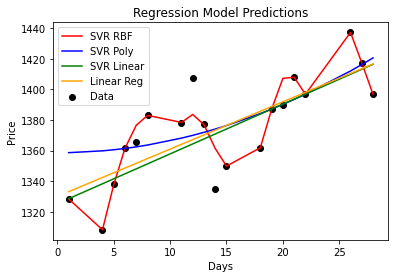

(1388.2810621076776, 1419.59525244433, 1425.0149836479582, 1419.6552097683855)


In [184]:
# Now we will predict the price on the the specific day that is the prive in the last row that we have eleminated that is 2020-05-01.

predicted_price = predict_prices(dates, prices, [[29]])

print(predicted_price)